# Load Data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv ('Womens Clothing E-Commerce Reviews.csv')   

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.shape

(23486, 11)

Means the dataframe has 23488 rows and 11 coloums

# Select 2Coloums 

In [5]:
reviews_df = df[["Review Text","Rating"]]
reviews_df.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


# Remove Nan value 

In [6]:
reviews_df.isnull().any()

Review Text     True
Rating         False
dtype: bool

In [7]:
nan_rows = reviews_df[reviews_df['Review Text'].isnull()]
print(nan_rows)

      Review Text  Rating
92            NaN       5
93            NaN       5
98            NaN       5
135           NaN       4
142           NaN       5
...           ...     ...
23258         NaN       4
23301         NaN       5
23303         NaN       5
23470         NaN       5
23480         NaN       5

[845 rows x 2 columns]


In [8]:
reviews_df = reviews_df.dropna()
reviews_df = reviews_df.reset_index(drop=True)
reviews_df.isnull().any()

Review Text    False
Rating         False
dtype: bool

In [9]:
reviews_df.tail()

,Review Text,Rating
22636,I was very happy to snag this dress at such a ...,5
22637,"It reminds me of maternity clothes. soft, stre...",3
22638,"This fit well, but the top was very see throug...",3
22639,I bought this dress for a wedding i have this ...,3
22640,This dress in a lovely platinum is feminine an...,5


## Count Rows

In [10]:
reviews_df['Rating'].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

Text(0, 0.5, 'Counts')

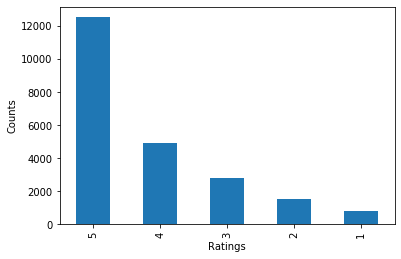

In [12]:
import matplotlib.pyplot as plt
reviews_df["Rating"].value_counts().plot(kind='bar')
plt.xlabel("Ratings")
plt.ylabel("Counts")

# Preprocessing Data

In [13]:
import nltk

# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

def clean_text(text):
    
    # lower text
    text = text.lower()
    
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop and x not in clothes]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["clean review text"] = reviews_df["Review Text"].apply(lambda x: clean_text(x))

In [14]:
reviews_df.head()

,Review Text,Rating,clean review text
0,Absolutely wonderful - silky and sexy and comf...,4,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,5,love sooo pretty happen find store i'm glad bc...
2,I had such high hopes for this dress and reall...,3,high hope really want work initially order pet...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,5,flatter due adjustable front tie perfect lengt...


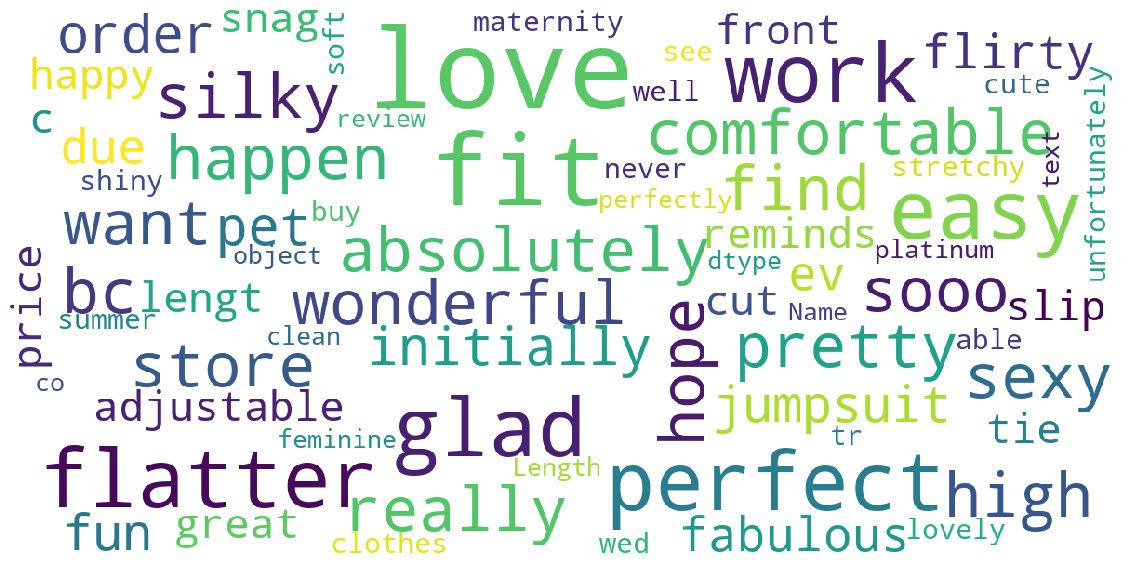

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["clean review text"])

In [16]:
# Rating of 4 or higher -> positive 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral so remove
df = reviews_df[reviews_df['Rating'] != 3]
df['Sentiment'] = reviews_df['Rating'] >=4
df.head()

C:\Users\iqmalhafiyy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Review Text,Rating,clean review text,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,absolutely wonderful silky sexy comfortable,True
1,Love this dress! it's sooo pretty. i happene...,5,love sooo pretty happen find store i'm glad bc...,True
3,"I love, love, love this jumpsuit. it's fun, fl...",5,love love love jumpsuit fun flirty fabulous ev...,True
4,This shirt is very flattering to all due to th...,5,flatter due adjustable front tie perfect lengt...,True
5,"I love tracy reese dresses, but this one is no...",2,love tracy reese dress one petite foot tall us...,False


# Split data into train and test set

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [32]:
# split data
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)

#define vectorizer
vectorizer = CountVectorizer()

# select the columns and prepare data for the models 
X_train = vectorizer.fit_transform(train_data['clean review text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['clean review text'])
y_test = test_data['Sentiment']

Next, we create a numerical feature vector for each document

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt

## Logistic Regression

In [34]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Naive Bayes

In [35]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Support Vector Machine (SVM)

In [36]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Neural Network

In [37]:
nn = MLPClassifier()
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Evaluating Models

In [38]:
# define a dataframe for the predictions
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2['Naive Bayes'] = nb.predict(X_train)
df2['SVM'] = svm.predict(X_train)
df2['Neural Network'] = nn.predict(X_train)
df2.head()

,Review Text,Rating,clean review text,Sentiment,Logistic Regression,Naive Bayes,SVM,Neural Network
17504,Love this dress so beautiful embroidery is lov...,5,love beautiful embroidery lovely....well worth...,True,True,True,True,True
13726,I got this top in white and it is cute. the fa...,4,get cute weird kind polyester kind shiny get m...,True,True,True,True,True
2834,I got this shirt in light blue. i absolutely l...,4,get light blue absolutely love buy summer wore...,True,True,True,True,True
9798,Great color and fabric! a bit on the sheer sid...,5,great bit sheer side completely see-through pe...,True,True,True,True,True
14529,Then this one is for you! so disappointed upon...,2,one disappointed upon receipt eye excite see s...,False,False,False,False,False


## ROC Curves

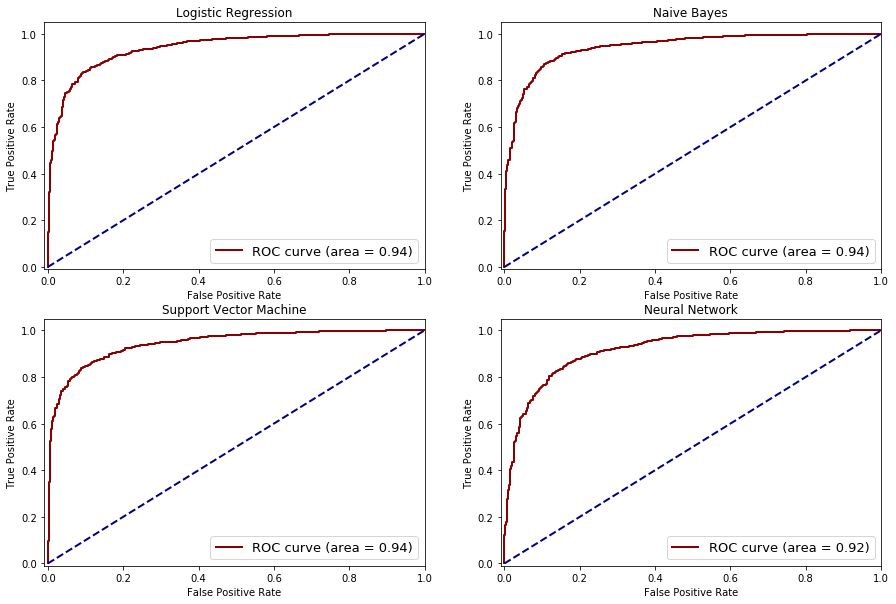

In [39]:
pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_nn = nn.predict_proba(X_test)[:,1]
fpr_nn,tpr_nn,_ = roc_curve(y_test.values,pred_nn)
roc_auc_nn = auc(fpr_nn,tpr_nn)

f, axes = plt.subplots(2, 2,figsize=(15,10))
axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[0,1].legend(loc='lower right', fontsize=13)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

axes[1,1].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nn))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Neural Network')
axes[1,1].legend(loc='lower right', fontsize=13);

## Precision - Recall - F1-Score

In [40]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n Neural Network")
print(mt.classification_report(y_test, nn.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

       False       0.76      0.57      0.65       494
        True       0.94      0.97      0.96      3470

    accuracy                           0.92      3964
   macro avg       0.85      0.77      0.80      3964
weighted avg       0.92      0.92      0.92      3964


 Naive Bayes
              precision    recall  f1-score   support

       False       0.77      0.53      0.63       494
        True       0.94      0.98      0.96      3470

    accuracy                           0.92      3964
   macro avg       0.85      0.76      0.79      3964
weighted avg       0.92      0.92      0.92      3964


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

       False       0.82      0.41      0.55       494
        True       0.92      0.99      0.95      3470

    accuracy                           0.92      3964
   macro avg       0.87      0.70      0.75      3964
weighted 